In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import model_selection

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

# Data loading and pretreatment

In [2]:
taxi_data = pd.read_csv("taxi_pretreatment.csv")

In [3]:
taxi_data.head()

,depart_nom,depart_latitude,depart_longitude,depart_agglomeration,arrive_latitude,arrive_longitude,arrive_nom,arrive_agglomeration,distance,virages,embouteillage,prix
0,Centre des handicapes,3.863966,11.490792,2,3.876103,11.497105,mokolo-marché,5,2.300,7,5,150
1,Centre des handicapes,3.863967,11.490793,2,3.864167,11.496965,Total Melen,4,7.500,3,3,100
2,Centre des handicapes,3.863968,11.490794,2,3.862409,11.504112,Carefour EMIA,1,1.614,7,3,350
3,Centre des handicapes,3.863969,11.490795,2,3.892244,11.511425,Bastos(carrefour),2,5.297,14,3,350
4,Centre des handicapes,3.863970,11.490796,2,3.876147,11.489672,Cité verte,2,2.300,10,1,150


In [4]:
data = taxi_data.loc[:, ['distance', 'virages', 'prix']]
data.dropna(inplace=True)
print(data.shape)

(2258, 3)


In [5]:
data = data.astype(np.float32) 
data.ftypes

distance    float32:dense
virages     float32:dense
prix        float32:dense
dtype: object

In [6]:
data = data[["distance", "virages", "prix"]]
data_array = data.as_matrix() # to_records(index=False)

X, y = data_array[:, [0,1]], data_array[:, 2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
m, n = X_train.shape
u, v = X_test.shape
print(X_train.shape)
print(X_test.shape)

X_train_bias = np.c_[X_train, np.float32(np.ones((m, 1)))]
X_test_bias = np.c_[X_test, np.ones((u, 1))]

(1806, 2)
(452, 2)


# TF init

In [7]:
tf.reset_default_graph()

In [8]:
X_data = tf.placeholder(shape=[None, n+1], dtype=np.float32, name="X")
y_data = tf.placeholder(shape=[None, 1], dtype=np.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")

y_pred = tf.matmul(X_data, theta, name="predictions")
error = y_pred - y_data
mse = tf.reduce_mean(tf.square(error), name="mse")

# Mini-batch processing

In [9]:
learning_rate = 0.001

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.89)
training_op = optimizer.minimize(mse)

In [10]:
n_epochs = 100
batch_size = 400
n_batches = int(np.ceil(m / batch_size))

In [11]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(m, size=batch_size)
    X_batch = X_train_bias[indices]
    y_batch = y_train.reshape(-1, 1)[indices]
    
    return X_batch, y_batch

In [12]:
# mini-batch gradient descent

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    losses = pd.DataFrame([]);
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch, batch_size)
            sess.run(training_op, feed_dict={X_data: X_batch, y_data: y_batch})
            
            print("MSE =", mse.eval(feed_dict={X_data: X_batch, y_data: y_batch}))
            loss = sess.run(mse, feed_dict={X_data: X_batch, y_data: y_batch})
            losses = losses.append({ "loss": loss, "step": int(epoch*n_batches + batch) }, ignore_index=True)
        print()
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

MSE = 41117.8
MSE = 26030.2
MSE = 69841.3
MSE = 81949.7
MSE = 35193.5

MSE = 18763.6
MSE = 58248.3
MSE = 56693.6
MSE = 26402.9
MSE = 16859.0

MSE = 34114.6
MSE = 44310.1
MSE = 22823.1
MSE = 14540.8
MSE = 29001.7

MSE = 32251.9
MSE = 18333.8
MSE = 10948.6
MSE = 23564.4
MSE = 26813.9

MSE = 17292.9
MSE = 16064.8
MSE = 17370.9
MSE = 21715.0
MSE = 16291.6

MSE = 15419.8
MSE = 16431.4
MSE = 20251.3
MSE = 15048.7
MSE = 15184.3

MSE = 16648.3
MSE = 16127.3
MSE = 16076.1
MSE = 13449.4
MSE = 14687.1

MSE = 18337.3
MSE = 14372.4
MSE = 15654.8
MSE = 15566.4
MSE = 15698.6

MSE = 16626.5
MSE = 14623.1
MSE = 15938.5
MSE = 14488.4
MSE = 14641.4

MSE = 11783.6
MSE = 14735.7
MSE = 15741.3
MSE = 16905.7
MSE = 14517.6

MSE = 14828.5
MSE = 13410.9
MSE = 14935.2
MSE = 11819.1
MSE = 14329.1

MSE = 15613.2
MSE = 13050.8
MSE = 14228.1
MSE = 14070.8
MSE = 12877.0

MSE = 13501.0
MSE = 14013.1
MSE = 13272.3
MSE = 13423.1
MSE = 13294.0

MSE = 13589.7
MSE = 16259.9
MSE = 13724.5
MSE = 13097.3
MSE = 14093.1

MSE = 

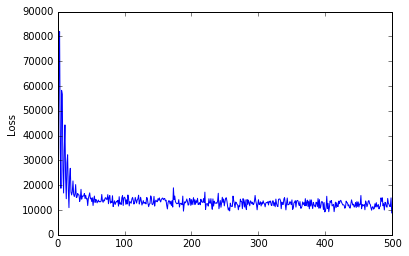

In [15]:
# Display the losses

plt.plot(losses['step'], losses['loss'])
plt.ylabel('Loss')
plt.show()

# Batch processing

In [14]:
n_epochs = 1000

In [10]:
decay_rate = 0.5
learning_rate = 0.01

def learning_rate_decay(learning_rate, epoch):
    return learning_rate/(1 + decay_rate*epoch)

In [15]:
# learning_rate = tf.placeholder(np.float32, name="learning_rate")

learning_rate = 0.00275 # 0.0067625
global_step = tf.Variable(0, name="globa_step", trainable=False)
learning_rate = tf.train.exponential_decay(
    learning_rate=learning_rate, 
    global_step=global_step, 
    decay_steps=1, 
    decay_rate=0.8, 
    staircase=True
)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate) # MomentumOptimizer(learning_rate=learning_rate, momentum=0.89)
training_op = optimizer.minimize(mse)

In [16]:
y_train = y_train.reshape(-1, 1)
epoch = 0

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    losses = [];
    pred_loss = 0;
    
    # Loop until it converges
    # while True:
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X_data: X_train_bias, y_data: y_train})
        
        loss = sess.run(mse, feed_dict={X_data: X_train_bias, y_data: y_train})
        losses.append(loss)
#         epoch = epoch + 1
        
        print("Learning rate = ", learning_rate, ". Loss = ", loss, ". Pred = ", pred_loss)
        print("MSE =", loss)
        print()
        
#         if np.abs(pred_loss - loss) < 0.001 :
#             break
#         else: 
#             pred_loss = loss;
        # learning_rate = learning_rate_decay(learning_rate, epoch)
        
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)
print("Epochs : ", epoch)

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  43040.9 . Pred =  0
MSE = 43040.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  24727.3 . Pred =  0
MSE = 24727.3

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  19989.9 . Pred =  0
MSE = 19989.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  18508.0 . Pred =  0
MSE = 18508.0

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  17838.2 . Pred =  0
MSE = 17838.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  17398.1 . Pred =  0
MSE = 17398.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  17045.8 . Pred =  0
MSE = 17045.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  16743.6 . Pred =  0
MSE = 16743.6

Learning rate =  Tensor("ExponentialDecay_1:0", shape=()

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14121.8 . Pred =  0
MSE = 14121.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14118.2 . Pred =  0
MSE = 14118.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14114.6 . Pred =  0
MSE = 14114.6

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14111.0 . Pred =  0
MSE = 14111.0

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14107.4 . Pred =  0
MSE = 14107.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14103.9 . Pred =  0
MSE = 14103.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14100.3 . Pred =  0
MSE = 14100.3

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  14096.7 . Pred =  0
MSE = 14096.7

Learning rate =  Tensor("ExponentialDecay_1:0", shape=()

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13684.1 . Pred =  0
MSE = 13684.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13681.1 . Pred =  0
MSE = 13681.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13678.2 . Pred =  0
MSE = 13678.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13675.2 . Pred =  0
MSE = 13675.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13672.3 . Pred =  0
MSE = 13672.3

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13669.4 . Pred =  0
MSE = 13669.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13666.4 . Pred =  0
MSE = 13666.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13663.5 . Pred =  0
MSE = 13663.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=()

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13331.9 . Pred =  0
MSE = 13331.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13329.5 . Pred =  0
MSE = 13329.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13327.0 . Pred =  0
MSE = 13327.0

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13324.6 . Pred =  0
MSE = 13324.6

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13322.2 . Pred =  0
MSE = 13322.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13319.8 . Pred =  0
MSE = 13319.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13317.3 . Pred =  0
MSE = 13317.3

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13314.9 . Pred =  0
MSE = 13314.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=()

MSE = 13053.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13051.5 . Pred =  0
MSE = 13051.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13049.5 . Pred =  0
MSE = 13049.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13047.4 . Pred =  0
MSE = 13047.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13045.4 . Pred =  0
MSE = 13045.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13043.4 . Pred =  0
MSE = 13043.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13041.4 . Pred =  0
MSE = 13041.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13039.4 . Pred =  0
MSE = 13039.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  13037.4 . Pred =  0
MSE = 13037.4

Learning rate =  Tensor("ExponentialDecay

MSE = 12823.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12821.8 . Pred =  0
MSE = 12821.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12820.1 . Pred =  0
MSE = 12820.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12818.5 . Pred =  0
MSE = 12818.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12816.8 . Pred =  0
MSE = 12816.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12815.1 . Pred =  0
MSE = 12815.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12813.4 . Pred =  0
MSE = 12813.4

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12811.7 . Pred =  0
MSE = 12811.7

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12810.1 . Pred =  0
MSE = 12810.1

Learning rate =  Tensor("ExponentialDecay

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12616.5 . Pred =  0
MSE = 12616.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12615.1 . Pred =  0
MSE = 12615.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12613.7 . Pred =  0
MSE = 12613.7

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12612.3 . Pred =  0
MSE = 12612.3

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12610.9 . Pred =  0
MSE = 12610.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12609.6 . Pred =  0
MSE = 12609.6

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12608.2 . Pred =  0
MSE = 12608.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12606.8 . Pred =  0
MSE = 12606.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=()

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12427.6 . Pred =  0
MSE = 12427.6

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12426.5 . Pred =  0
MSE = 12426.5

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12425.3 . Pred =  0
MSE = 12425.3

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12424.2 . Pred =  0
MSE = 12424.2

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12423.1 . Pred =  0
MSE = 12423.1

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12422.0 . Pred =  0
MSE = 12422.0

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12420.9 . Pred =  0
MSE = 12420.9

Learning rate =  Tensor("ExponentialDecay_1:0", shape=(), dtype=float32) . Loss =  12419.8 . Pred =  0
MSE = 12419.8

Learning rate =  Tensor("ExponentialDecay_1:0", shape=()

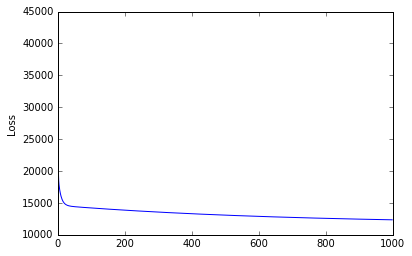

In [17]:
# Display the losses

plt.plot(range(n_epochs), losses)
plt.ylabel('Loss')
plt.show()

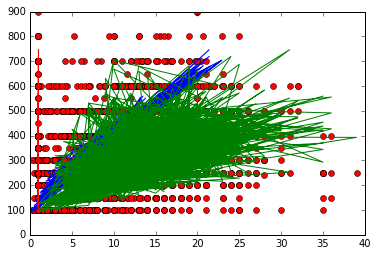

In [26]:
plt.plot(X_train_bias, y_train, 'ro', label="Original data")
plt.plot(X_train_bias, np.matmul(X_train_bias, best_theta), label="Fitted line")